<a href="https://colab.research.google.com/github/kinjaljoshi/image_processing/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
image1 = cv2.imread('/content/sampleimage.png')

gray_image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/gray_image.png', gray_image1)
blurred_image1 = cv2.GaussianBlur(gray_image1, (5, 5), 1.4)
cv2.imwrite('/content/blurred_image.png', blurred_image1)

True

In [ ]:
#without noise reduction
Gx = cv2.Sobel(blurred_image1, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(blurred_image1, cv2.CV_64F, 0, 1, ksize=3)
Gx,Gy

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
import numpy as np
magnitude = np.sqrt(Gx**2 + Gy**2)
angle = np.arctan2(Gy, Gx) * (180.0 / np.pi)
magnitude,angle

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
angle[angle < 0] += 180
angle[0,0]
angle.shape

(550, 427)

In [ ]:
suppressed = np.zeros_like(magnitude)
suppressed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
for i in range(1, magnitude.shape[0] - 1):
    for j in range(1, magnitude.shape[1] - 1):
        # Angle 0
        #print(f'i = {i}, j = {j}, angle = {angle[i, j]}')
        if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
            neighbors = [magnitude[i, j-1], magnitude[i, j+1]]
        # Angle 45
        elif 22.5 <= angle[i, j] < 67.5:
            neighbors = [magnitude[i-1, j+1], magnitude[i+1, j-1]]
        # Angle 90
        elif 67.5 <= angle[i, j] < 112.5:
            neighbors = [magnitude[i-1, j], magnitude[i+1, j]]
        # Angle 135
        elif 112.5 <= angle[i, j] < 157.5:
            neighbors = [magnitude[i-1, j-1], magnitude[i+1, j+1]]

        # Suppress the pixel if it's not the maximum
        if magnitude[i, j] >= max(neighbors):
            suppressed[i, j] = magnitude[i, j]

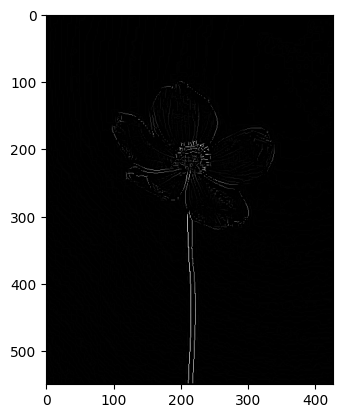

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(suppressed, cmap='gray')
plt.show()

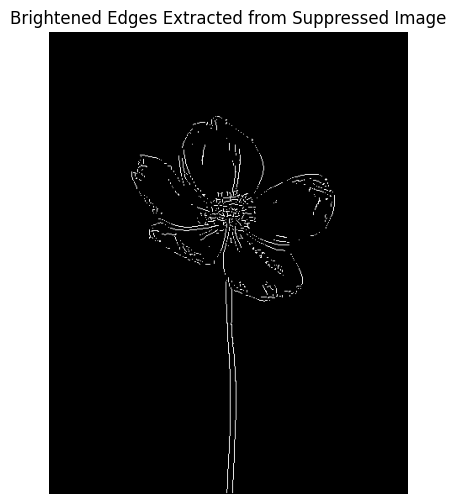

In [ ]:
# Extract edges by applying a threshold to the suppressed image

_, edges1 = cv2.threshold(suppressed, 30, 255, cv2.THRESH_BINARY)
edges = np.uint8(edges1)

# Apply further thresholding to ensure edges are fully white
_, bright_edges1 = cv2.threshold(edges1, 1, 255, cv2.THRESH_BINARY)

# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(bright_edges1, cmap='gray')
plt.title('Brightened Edges Extracted from Suppressed Image')
plt.axis('off')
plt.show()

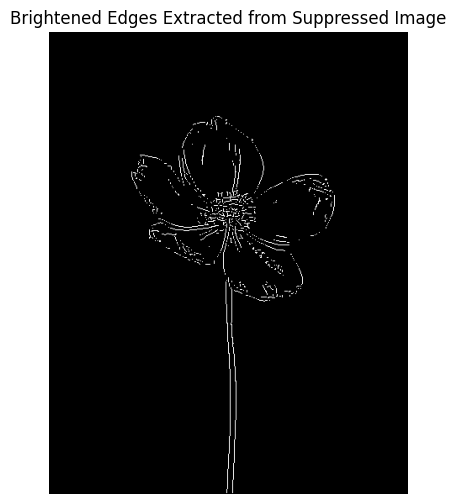

In [ ]:
#8 bit format
edges1 = np.uint8(edges1)

# Apply thresholding to make all non-black pixels white
_, bright_edges1 = cv2.threshold(edges1, 1, 255, cv2.THRESH_BINARY)
# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(bright_edges1, cmap='gray')
plt.title('Brightened Edges Extracted from Suppressed Image')
plt.axis('off')
plt.show()

In [ ]:
# Apply the Hough Transform to detect lines

# lines: each line is represented by a pair (rho, theta)
# Make a copy of the original image to draw lines on
line_image1 = np.copy(bright_edges1)
lines1 = cv2.HoughLines(bright_edges1, 1, np.pi / 180, 200)

# Iterate over the lines and draw them
if lines1 is not None:
    for rho, theta in lines1[:, 0]:
        # Calculate the x and y coordinates of the line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # Calculate two points along the line
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * a)
        # Draw the line on the image
        cv2.line(line_image1, (x1, y1), (x2, y2), (0, 0, 255), 2)

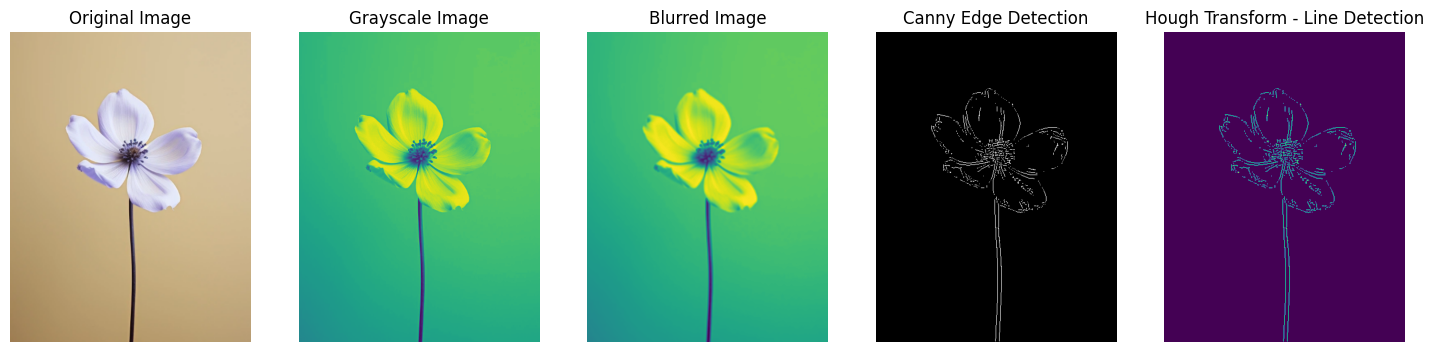

In [ ]:
# Plot the images side by side
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 5, 1)
plt.imshow(image1)
plt.title('Original Image')
plt.axis('off')


# Grayscale Image
plt.subplot(1, 5, 2)
plt.imshow(gray_image1)
plt.title('Grayscale Image')
plt.axis('off')


# Blurred Image
plt.subplot(1, 5, 3)
plt.imshow(blurred_image1)
plt.title('Blurred Image')
plt.axis('off')

# Canny Edge Detection
plt.subplot(1, 5, 4)
plt.imshow(bright_edges1, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

# Hough Transform with Detected Lines
plt.subplot(1, 5, 5)
plt.imshow(line_image1)
plt.title('Hough Transform - Line Detection')
plt.axis('off')

plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/sampleimage.png')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1.4)

# Use Canny edge detection
edges = cv2.Canny(blurred_image, 50, 150)

# Apply the Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# lines: each line is represented by a pair (rho, theta)
# Make a copy of the original image to draw lines on
line_image = np.copy(edges)

# Iterate over the lines and draw them
if lines is not None:
    for rho, theta in lines[:, 0]:
        # Calculate the x and y coordinates of the line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # Calculate two points along the line
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * a)
        # Draw the line on the image
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

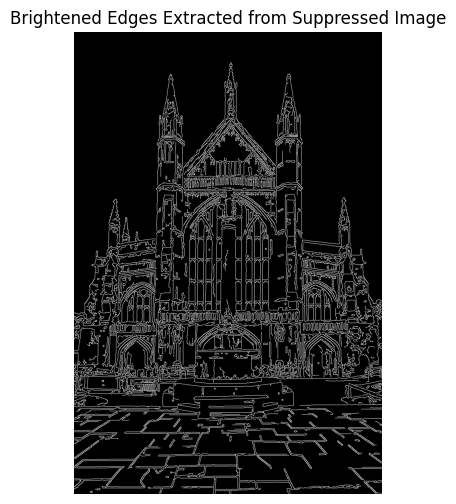

In [ ]:
#8 bit format
edges1 = np.uint8(edges)

# Apply thresholding to make all non-black pixels white
_, bright_edges1 = cv2.threshold(edges1, 1, 255, cv2.THRESH_BINARY)
# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(bright_edges1, cmap='gray')
plt.title('Brightened Edges Extracted from Suppressed Image')
plt.axis('off')
plt.show()

In [ ]:
# Apply the Hough Transform to detect lines

# lines: each line is represented by a pair (rho, theta)
# Make a copy of the original image to draw lines on
line_image2 = np.copy(bright_edges1)
lines1 = cv2.HoughLines(bright_edges1, 1, np.pi / 180, 200)

# Iterate over the lines and draw them
if lines1 is not None:
    for rho, theta in lines1[:, 0]:
        # Calculate the x and y coordinates of the line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # Calculate two points along the line
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * a)
        # Draw the line on the image
        cv2.line(line_image2, (x1, y1), (x2, y2), (0, 0, 255), 2)

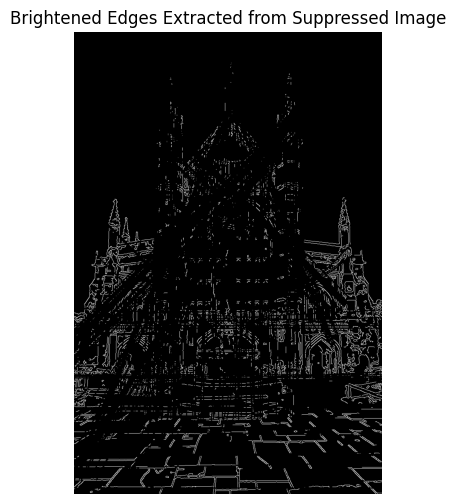

In [ ]:
# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(line_image2, cmap='gray')
plt.title('Brightened Edges Extracted from Suppressed Image')
plt.axis('off')
plt.show()

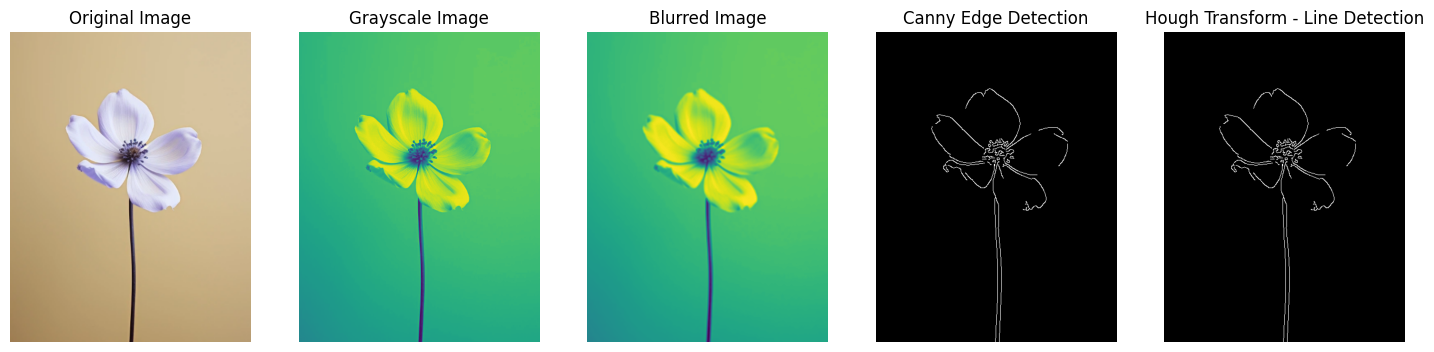

In [ ]:
# Plot the images side by side
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 5, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')


# Grayscale Image
plt.subplot(1, 5, 2)
plt.imshow(gray_image)
plt.title('Grayscale Image')
plt.axis('off')


# Blurred Image
plt.subplot(1, 5, 3)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

# Canny Edge Detection
plt.subplot(1, 5, 4)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

# Hough Transform with Detected Lines
plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Line Detection')
plt.axis('off')

plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/winchester.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1.4)

# Use Canny edge detection
edges = cv2.Canny(blurred_image, 50, 150)

# Apply the Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# lines: each line is represented by a pair (rho, theta)
# Make a copy of the original image to draw lines on
line_image = np.copy(edges)

# Iterate over the lines and draw them
if lines is not None:
    for rho, theta in lines[:, 0]:
        # Calculate the x and y coordinates of the line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # Calculate two points along the line
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * a)
        # Draw the line on the image
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

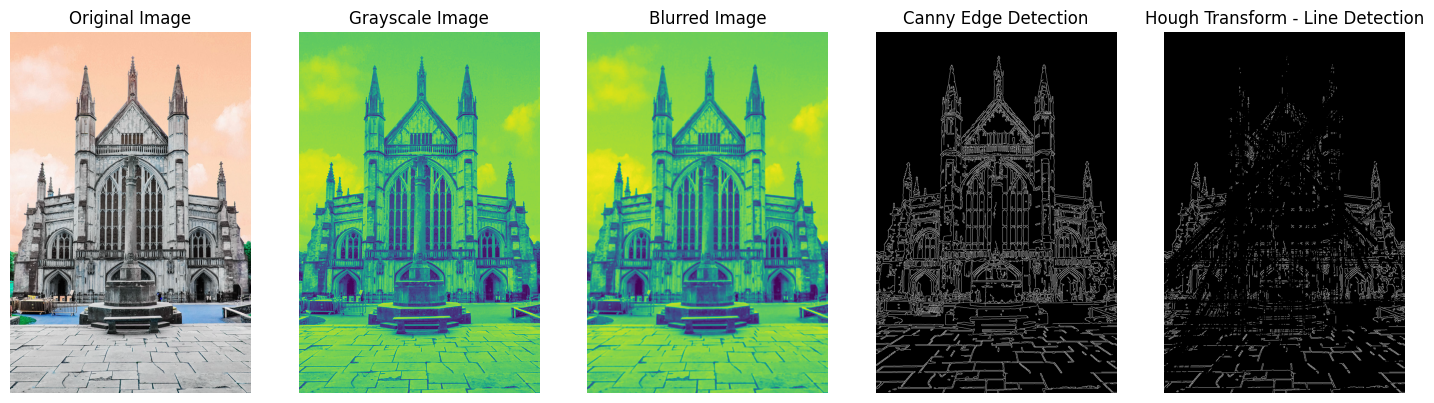

In [ ]:
# Plot the images side by side
plt.figure(figsize=(18, 10))

# Original Image
plt.subplot(1, 5, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')


# Grayscale Image
plt.subplot(1, 5, 2)
plt.imshow(gray_image)
plt.title('Grayscale Image')
plt.axis('off')


# Blurred Image
plt.subplot(1, 5, 3)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

# Canny Edge Detection
plt.subplot(1, 5, 4)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

# Hough Transform with Detected Lines
plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Line Detection')
plt.axis('off')

plt.show()

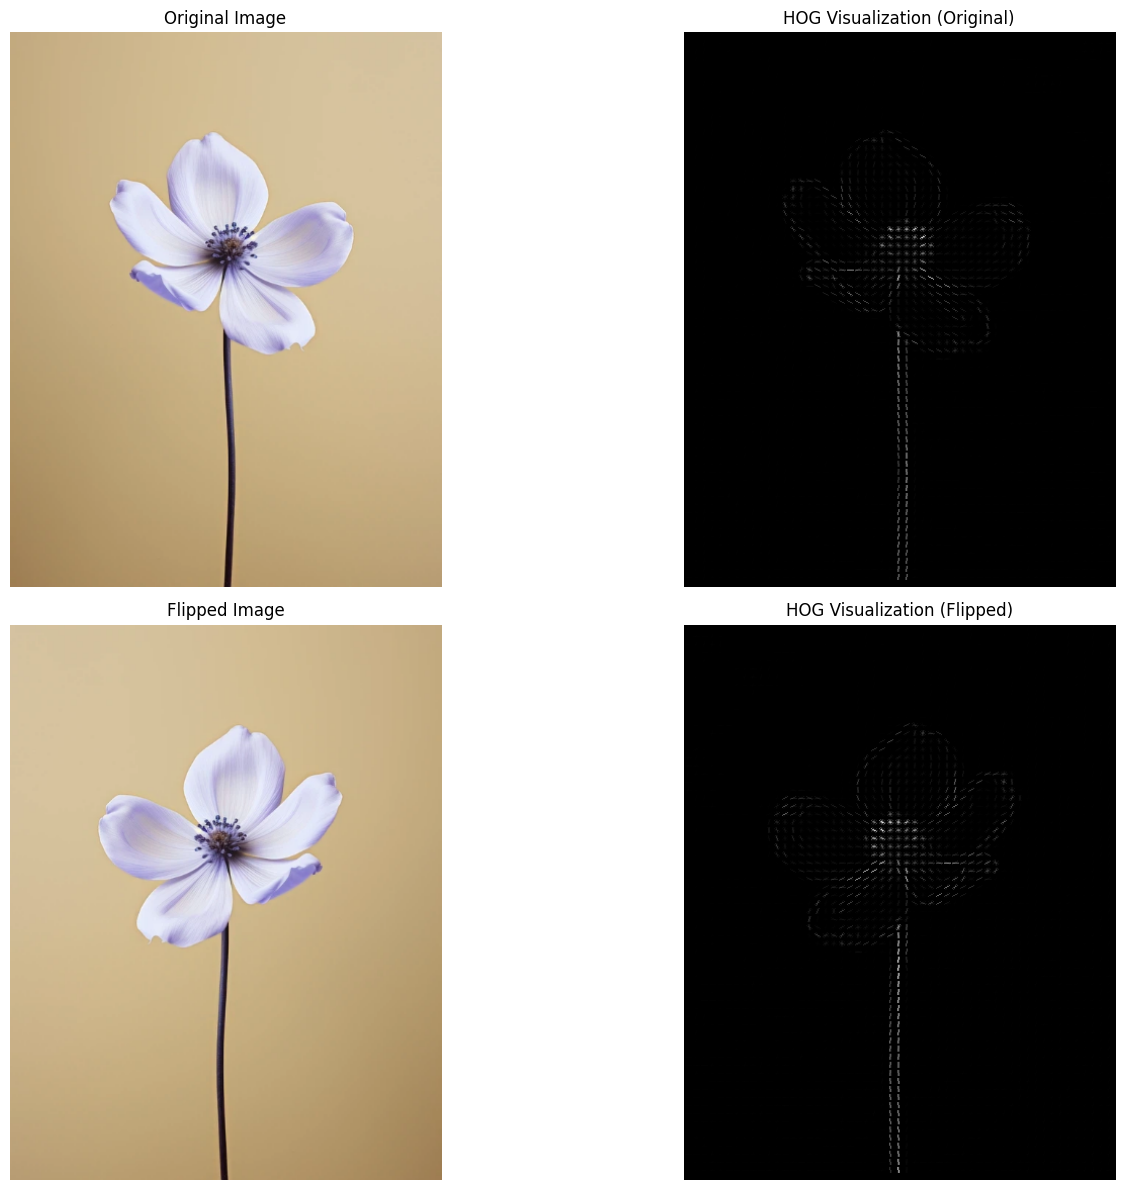

In [ ]:
from skimage import feature, color, io
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/sampleimage.png')
# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Flip the image horizontally
flipped_image = np.fliplr(image)
flipped_gray_image = color.rgb2gray(flipped_image)

# Compute HOG features and HOG image for the original image
hog_features_original, hog_image_original = feature.hog(
    gray_image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    feature_vector=True
)

# Compute HOG features and HOG image for the flipped image
hog_features_flipped, hog_image_flipped = feature.hog(
    flipped_gray_image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    feature_vector=True
)

# Plot the original, flipped, and their HOG visualization images side by side
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)

# Original image
axes[0, 0].imshow(image, cmap=plt.cm.gray)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# HOG of original image
axes[0, 1].imshow(hog_image_original, cmap=plt.cm.gray)
axes[0, 1].set_title('HOG Visualization (Original)')
axes[0, 1].axis('off')

# Flipped image
axes[1, 0].imshow(flipped_image, cmap=plt.cm.gray)
axes[1, 0].set_title('Flipped Image')
axes[1, 0].axis('off')

# HOG of flipped image
axes[1, 1].imshow(hog_image_flipped, cmap=plt.cm.gray)
axes[1, 1].set_title('HOG Visualization (Flipped)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


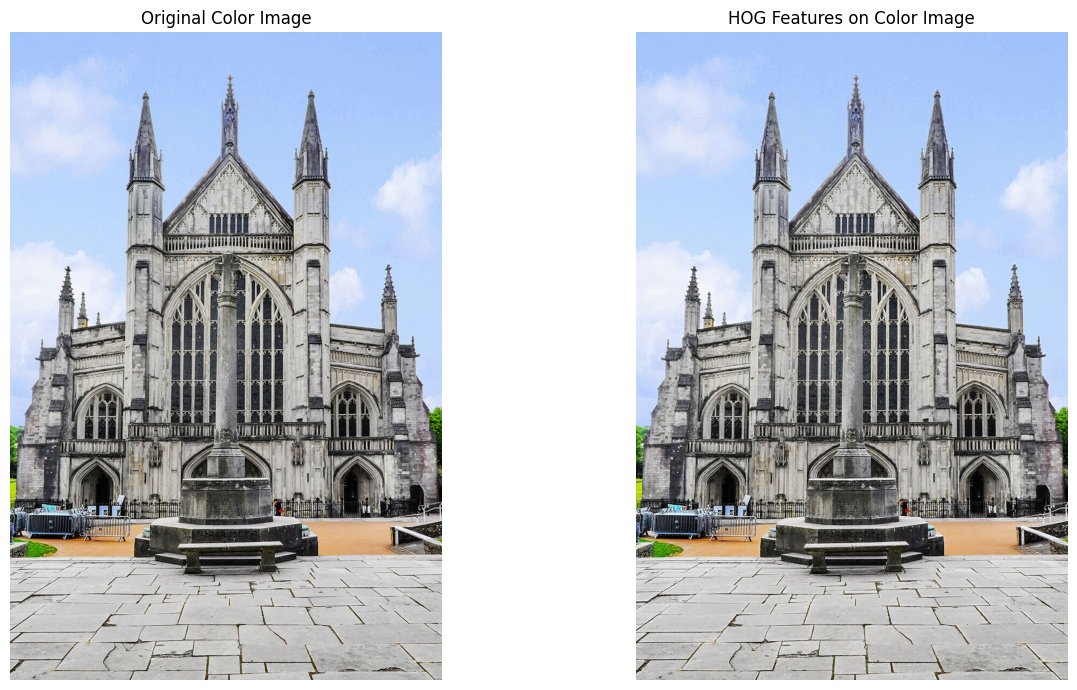

In [ ]:
from skimage import feature, color, io
import matplotlib.pyplot as plt
import numpy as np

# Load the color image
image = io.imread('/content/winchester.jpg')

# Convert the image to grayscale for HOG computation
gray_image = color.rgb2gray(image)

# Compute HOG features and HOG image for the original image
hog_features, hog_image = feature.hog(
    gray_image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    feature_vector=True
)

# Overlay the HOG image on the original color image
# We'll scale the HOG image to match the intensity range of the original image
hog_image_rescaled = np.uint8(255 * hog_image / hog_image.max())

# Convert the grayscale HOG image to a 3-channel image (same as the original color image)
hog_image_color = np.dstack((hog_image_rescaled, hog_image_rescaled, hog_image_rescaled))

# Overlay by adding the HOG image to the original image
overlayed_image = cv2.addWeighted(image, 1, hog_image_color, 0.3, 0)

# Plot the original color image and the HOG overlay image side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

# Original color image
ax1.imshow(image)
ax1.set_title('Original Color Image')
ax1.axis('off')

# HOG overlay on color image
ax2.imshow(overlayed_image)
ax2.set_title('HOG Features on Color Image')
ax2.axis('off')

plt.tight_layout()
plt.show()


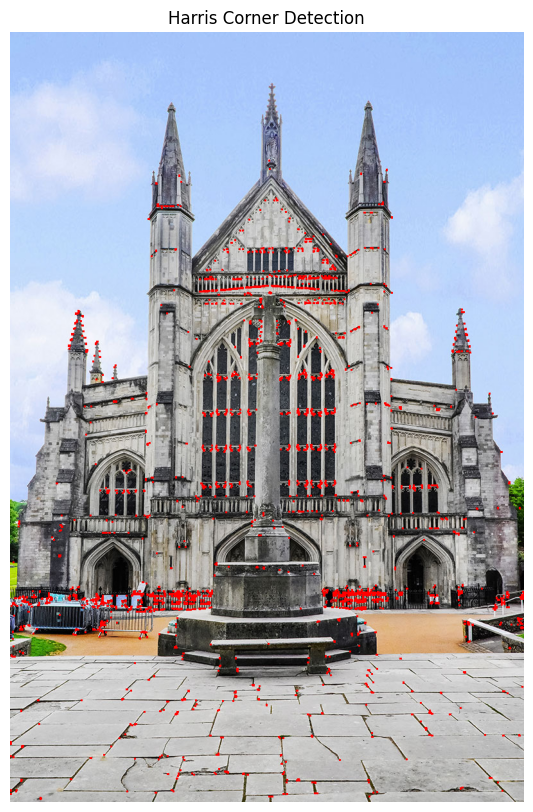

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/winchester.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to float32
gray_image = np.float32(gray_image)

# Apply the Harris Corner Detector
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)

# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value; marking the corners in red
image[dst > 0.1 * dst.max()] = [0, 0, 255]
# Display the original image with corners marked
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()


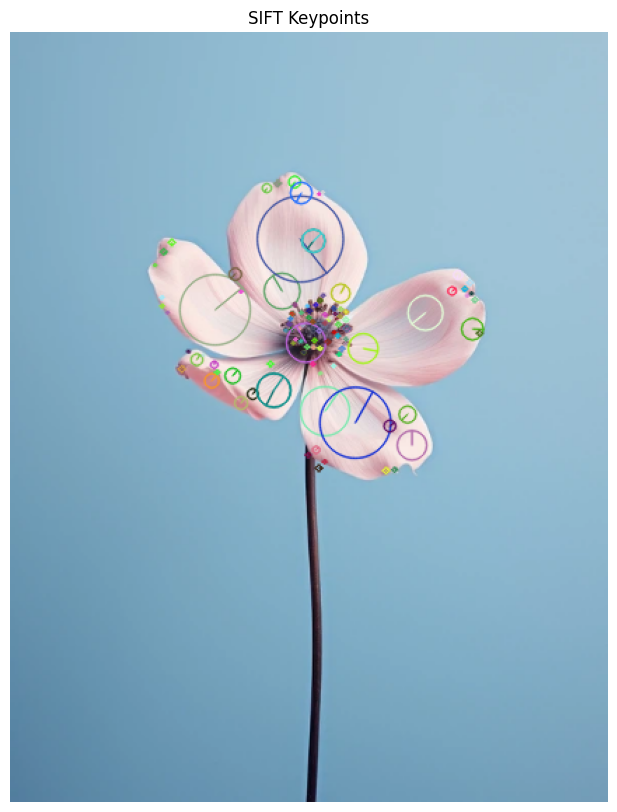

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/sampleimage.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a SIFT detector object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the original image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()
